In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
import plotly.graph_objects as go
import plotly.express as px
import math
import geopandas as gpd
import matplotlib.pyplot as plt
import datetime
from ipywidgets import widgets
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
# read in spreadsheets:
path = "C:/Users/kinna/OneDrive/MSDS/Notes/DS 5100/Project/Healthy-Happy-Hoos/World Happiness Report 2015-2016/"
df2015 = pd.read_csv(path+"2015.csv")
df2016 = pd.read_csv(path+"2016.csv")
df2017 = pd.read_csv(path+"2017.csv")
df2018 = pd.read_csv(path+"2018.csv")
df2019 = pd.read_csv(path+"2019.csv")
suicidepath="C:/Users/kinna/OneDrive/MSDS/Notes/DS 5100/Project/Healthy-Happy-Hoos/"
dfsuicide = pd.read_csv(suicidepath+"who_suicide_statistics.csv")
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))

In [3]:
#rename columns for agreement across dataframes
world = world.rename(columns = {'continent':'Continent'})
world = world.rename(columns = {'name':'Country'}) 
world = world.rename(columns = {'iso_a3':'Country_Code'})

In [4]:
#drop Antarctica
world = world[world.Country!="Antarctica"]

In [5]:
#rename Czechia to Czech Republic
world['Country'] = world['Country'].replace({'Czechia': 'Czech Republic'})

In [6]:
#remove population and gdp columns
world = world.drop(['pop_est','gdp_md_est'], axis = 1)

In [7]:
# add year column to happiness data
df2015['year'] = 2015
df2016['year'] = 2016
df2017['year'] = 2017
df2018['year'] = 2018
df2019['year'] = 2019

In [8]:
#remove inconsistent columns
df2015 = df2015.drop(['Standard Error', "Dystopia Residual","Region"], axis=1)
df2016 = df2016.drop(['Lower Confidence Interval','Upper Confidence Interval',"Dystopia Residual","Region"], axis=1)
df2017 = df2017.drop(['Whisker.high','Whisker.low','Dystopia.Residual'], axis=1)

In [9]:
#rename column names for consistency
df2017 = df2017.rename(columns = {"Economy..GDP.per.Capita.":"Economy (GDP per Capita)",
                                  "Happiness.Rank":"Happiness Rank",
                                  "Happiness.Score":"Happiness Score",
                                  "Health..Life.Expectancy.":"Health (Life Expectancy)",
                                  "Trust..Government.Corruption.":"Trust (Government Corruption)"})
df2018 = df2018.rename(columns = {'Country or region':"Country",
                                  "Freedom to make life choices":"Freedom",
                                  "GDP per capita":"Economy (GDP per Capita)",
                                  "Score":"Happiness Score",
                                  "Healthy life expectancy":"Health (Life Expectancy)",
                                  "Perceptions of corruption":"Trust (Government Corruption)",
                                  "Overall rank":"Happiness Rank",
                                  "Social support":"Family"})
df2019 = df2019.rename(columns = {'Country or region':"Country",
                                  "Freedom to make life choices":"Freedom",
                                  "GDP per capita":"Economy (GDP per Capita)",
                                  "Score":"Happiness Score",
                                  "Healthy life expectancy":"Health (Life Expectancy)",
                                  "Perceptions of corruption":"Trust (Government Corruption)",
                                  "Overall rank":"Happiness Rank",
                                  "Social support":"Family"})

In [10]:
# combine happiness data (2015-2016)
happy = df2015.append(df2016)
sorted(happy)

['Country',
 'Economy (GDP per Capita)',
 'Family',
 'Freedom',
 'Generosity',
 'Happiness Rank',
 'Happiness Score',
 'Health (Life Expectancy)',
 'Trust (Government Corruption)',
 'year']

In [11]:
#combine all happiness data (2015-2019)
happy_all = happy.append(df2017)
happy_all = happy_all.append(df2018)
happy_all = happy_all.append(df2019)

In [13]:
#rename for agreement across dataframes (world df used United States of America)
happy_all = happy_all.replace({'United States':'United States of America'})

In [14]:
#dropping 'Happiness Rank', 'Country' and 'year'
happy_all_ForPrediction= happy_all.copy(deep=True)
happy_all_ForPrediction.drop(['Happiness Rank', 'Country', 'year'], axis=1, inplace=True)
happy_all_ForPrediction.isnull().sum()

Happiness Score                  0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    1
Generosity                       0
dtype: int64

In [15]:
# We cleaned NA data from our variables to make further investigation on data year from 2015 to 2019
happy_all_ForPrediction.isnull().sum()
is_NaN = happy_all_ForPrediction.isnull()
row_has_NaN = is_NaN. any(axis=1)
rows_with_NaN = happy_all_ForPrediction[row_has_NaN]
rows_with_NaN
happy_all_ForPrediction = happy_all_ForPrediction.dropna()


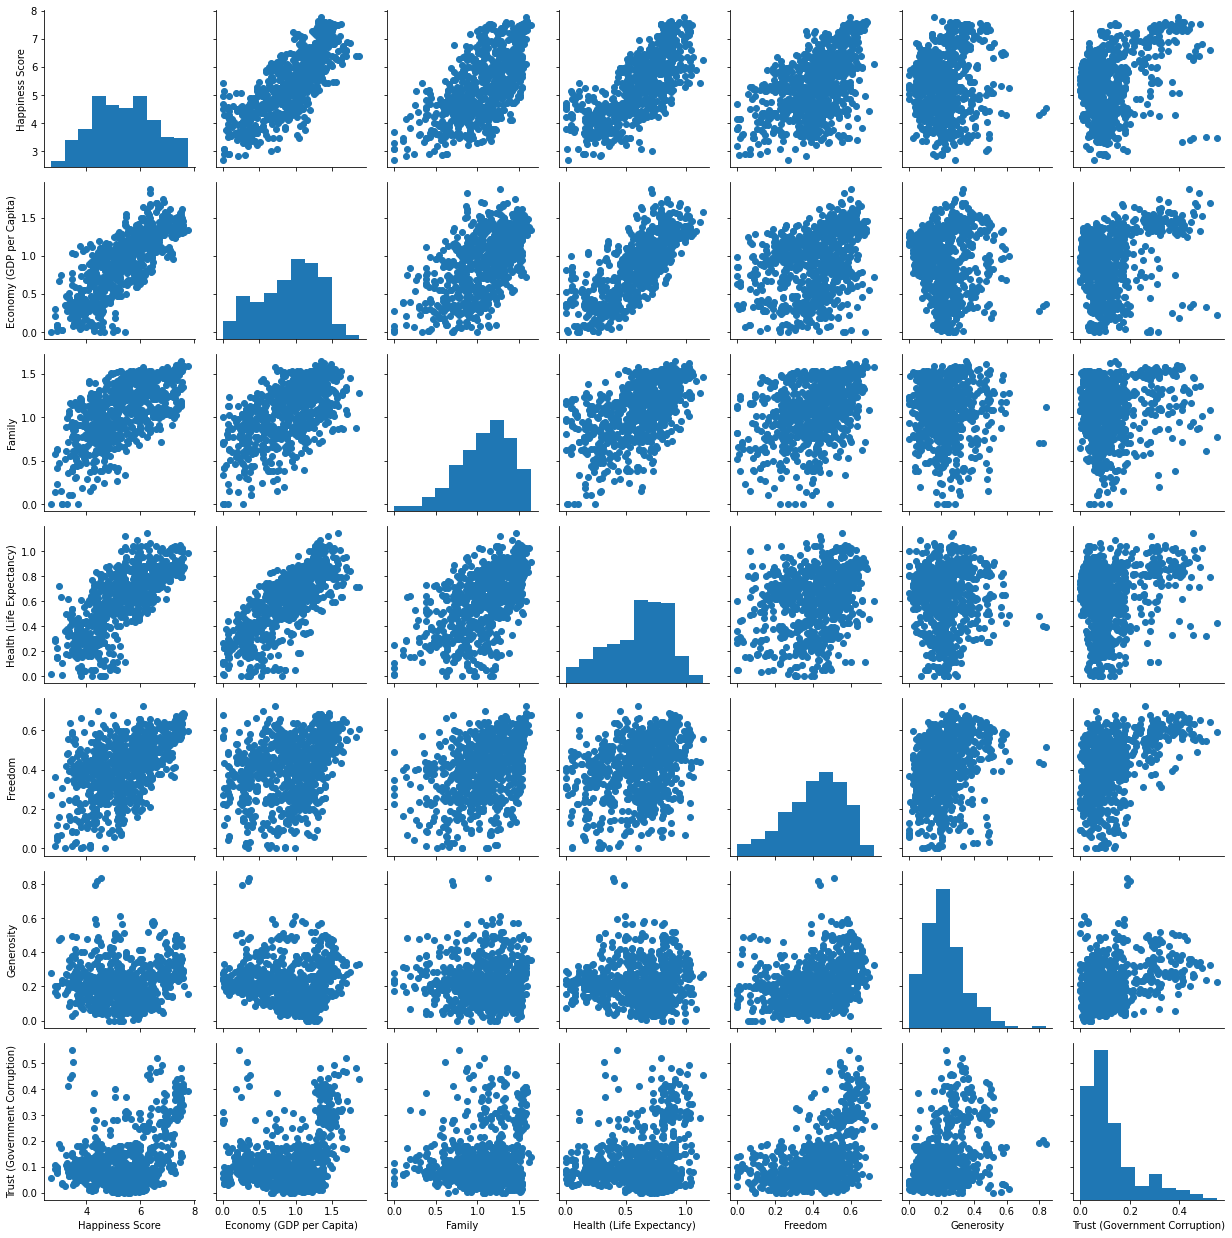

In [16]:
#Exploratory data analysis (“EDA”) 
g = sns.PairGrid(data = happy_all_ForPrediction, vars = ['Happiness Score','Economy (GDP per Capita)','Family','Health (Life Expectancy)', 'Freedom','Generosity','Trust (Government Corruption)'])
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter);

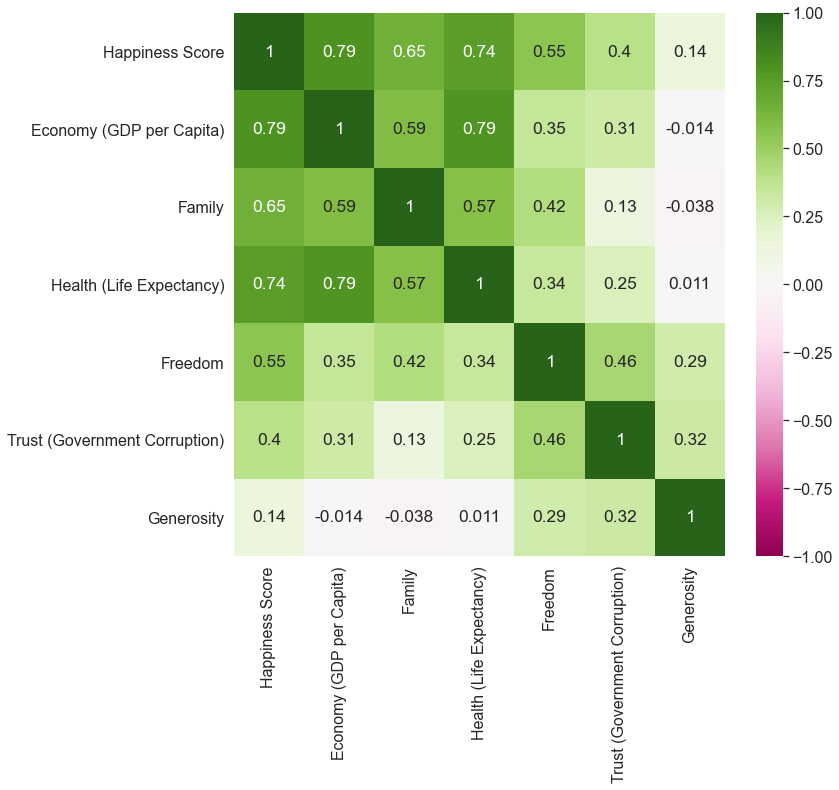

In [62]:
#plotting correlation map for data from 2015-2019 merged together
plt.figure(figsize=(11, 10))
sns.set(font_scale=1.45)
sns.heatmap(happy_all_ForPrediction.corr(), annot=True, vmin=-1.0, vmax=1.0, cmap="PiYG")#BrBG
plt.show()

In [82]:
import random


In [94]:
#Putting Happiness score as y (response variable) and everythihng else as predictor
y = happy_all_ForPrediction['Happiness Score']
X = happy_all_ForPrediction.drop('Happiness Score', axis=1)

In [95]:
scaler = MinMaxScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

In [96]:
#splitting dataset into 70% trainign and 30% into testing
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, random_state=100)

In [97]:
#fitting linear regression model
model = LinearRegression()
model.fit(X_train, y_train)
#R2 is printed here:
print(f"Regression R2: {model.score(X_test, y_test)}")#0.7725629878385142

Regression R2: 0.7725629878385142


In [35]:
#Merging happy all with world data
happy_all_world = world.merge(happy_all, on ='Country')

In [36]:
#combining the top 10 happy countries together
rslt_df2015 = happy_all_world[(happy_all_world['Happiness Rank'] <=10) &
          (happy_all_world['year']==2015)].sort_values('Happiness Rank', ascending=False)
rslt_df2016 = happy_all_world[(happy_all_world['Happiness Rank'] <=10) &
          (happy_all_world['year']==2016)].sort_values('Happiness Rank', ascending=False)
rslt_df2017 = happy_all_world[(happy_all_world['Happiness Rank'] <=10) &
          (happy_all_world['year']==2017)].sort_values('Happiness Rank', ascending=False)
rslt_df2018 = happy_all_world[(happy_all_world['Happiness Rank'] <=10) &
          (happy_all_world['year']==2018)].sort_values('Happiness Rank', ascending=False)
rslt_df2019 = happy_all_world[(happy_all_world['Happiness Rank'] <=10) &
          (happy_all_world['year']==2019)].sort_values('Happiness Rank', ascending=False)
rslt_df=pd.concat([rslt_df2015, rslt_df2016, rslt_df2017, rslt_df2018, rslt_df2019])

In [38]:
#checking Canada since it is observed in each data year
rslt_df.query("Country=='Canada'")

,Continent,Country,Country_Code,geometry,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
5,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.45811,2015
6,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",6,7.404,1.440150,1.096100,0.827600,0.573700,0.313290,0.44834,2016
7,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7,7.316,1.479204,1.481349,0.834558,0.611101,0.287372,0.43554,2017
8,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",7,7.328,1.330000,1.532000,0.896000,0.653000,0.291000,0.32100,2018
9,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",9,7.278,1.365000,1.505000,1.039000,0.584000,0.308000,0.28500,2019


In [39]:
canada=rslt_df.query("Country=='Canada'")
canada['Happiness_Lag']=canada['Happiness Score'].shift(periods=1)
canada['pct_change']=(canada['Happiness Score']-canada['Happiness_Lag'])/canada['Happiness_Lag'] *100

C:\Users\kinna\anaconda3\envs\geo_env\lib\site-packages\geopandas\geodataframe.py:1322: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  super(GeoDataFrame, self).__setitem__(key, value)


In [40]:
#happiness change for canada from 2015 to 2019
canada["pct_change"].mean()

-0.5041294940823549

In [41]:
#List of top ten happiest countries fo9r each year
rslt_df

,Continent,Country,Country_Code,geometry,Happiness Rank,Happiness Score,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,year
546,Oceania,Australia,AUS,"MULTIPOLYGON (((147.68926 -40.80826, 148.28907...",10,7.284,1.333580,1.309230,0.931560,0.651240,0.356370,0.435620,2015
541,Oceania,New Zealand,NZL,"MULTIPOLYGON (((176.88582 -40.06598, 176.50802...",9,7.286,1.250180,1.319670,0.908370,0.639380,0.429220,0.475010,2015
421,Europe,Sweden,SWE,"POLYGON ((11.02737 58.85615, 11.46827 59.43239...",8,7.364,1.331710,1.289070,0.910870,0.659800,0.438440,0.362620,2015
521,Europe,Netherlands,NLD,"POLYGON ((6.90514 53.48216, 7.09205 53.14404, ...",7,7.378,1.329440,1.280170,0.892840,0.615760,0.318140,0.476100,2015
610,Europe,Finland,FIN,"POLYGON ((28.59193 69.06478, 28.44594 68.36461...",6,7.406,1.290250,1.318260,0.889110,0.641690,0.413720,0.233510,2015
5,North America,Canada,CAN,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742...",5,7.427,1.326290,1.322610,0.905630,0.632970,0.329570,0.458110,2015
68,Europe,Norway,-99,"MULTIPOLYGON (((15.14282 79.67431, 15.52255 80...",4,7.522,1.459000,1.330950,0.885210,0.669730,0.365030,0.346990,2015
570,Europe,Denmark,DNK,"MULTIPOLYGON (((9.92191 54.98310, 9.28205 54.8...",3,7.527,1.325480,1.360580,0.874640,0.649380,0.483570,0.341390,2015
580,Europe,Iceland,ISL,"POLYGON ((-14.50870 66.45589, -14.73964 65.808...",2,7.561,1.302320,1.402230,0.947840,0.628770,0.141450,0.436300,2015
506,Europe,Switzerland,CHE,"POLYGON ((9.59423 47.52506, 9.63293 47.34760, ...",1,7.587,1.396510,1.349510,0.941430,0.665570,0.419780,0.296780,2015


In [66]:
#plotting the top happiest countries from 2015-2019
plt.figure(figsize=(22,22))
#sns.set(font_scale=1.45)
px.bar(data_frame = rslt_df, 
       y = 'Country', 
       x = 'Happiness Score', 
       animation_frame = 'year',
       color = 'Happiness Score', 
       title = 'Happiness Scores of the top 10 Happy Countries of the World for each year from 2015-2019',
      orientation='h'
    )

<Figure size 1584x1584 with 0 Axes>

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    title="Plot Title",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)


In [102]:
#plotting the top happiest countries from 2015-2019
plt.figure(figsize=(22,22))
#sns.set(font_scale=1.45)

import plotly.graph_objects as go

fig = go.Figure()

fig.update_layout(
    title="Plot Title",
    xaxis_title="x Axis Title",
    yaxis_title="y Axis Title",
    font=dict(
        family="Courier New, monospace",
        size=18,
        color="#7f7f7f"
    )
)



px.bar(data_frame = rslt_df, 
       y = 'Country', 
       x = 'Happiness Score', 
       animation_frame = 'year',
       color = 'Happiness Score', 
       title = 'Happiness Scores of the top 10 Happy Countries of the World for each year from 2015-2019',
       orientation='h'
    )

<Figure size 1584x1584 with 0 Axes>

In [43]:
#clean suicide data to merge it with happiness data. We will use this new data frame to produce interactive plot
#drop nan values
suic_fil = dfsuicide.dropna()

In [44]:
#renaming for agreement across dataframes
suic_fil = suic_fil.rename(columns = {'country':"Country"})

In [45]:
# drop sex and age
suic_fil = suic_fil.drop(['sex','age'], axis=1)

In [46]:
# sum population and suicides per country per year
suic_red = suic_fil.groupby(['Country', 'year'])['suicides_no','population'].agg('sum')

C:\Users\kinna\AppData\Local\Temp/ipykernel_4052/3866935475.py:2: FutureWarning:

Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.



In [47]:
# add per capita column
suic_red['per_capita'] = suic_red.suicides_no/suic_red.population

In [48]:
#merge suicide and happy dataframes together
happy_sad = pd.merge(suic_red, happy, on=['Country','year'])

In [49]:
#merge world and happy_sad dataframes together
whole_world = world.merge(happy_sad, on ='Country')

In [52]:
#using whole world data to create interactive plot
df=whole_world
origin = widgets.Dropdown(
    options=list(df['Continent'].unique()),
    value='Asia',
    description='Continent:',
)


# Assign an empty figure widget with two traces
# trace1 = go.Histogram(x=df['Happiness Score'], opacity=0.75, name='Happiness Score')
# first attempt
# trace1=go.Scatter(
#         x=df['suicides_no'],
#         y=df['Happiness Score'],
#         mode="markers",
#         marker=dict(color="DarkOrange")
#     )



#second attempt

trace1=go.Scatter(
        x=df['suicides_no'],
        y=df['Happiness Score'],
        mode="markers",
        marker=dict(color="DarkOrange"),
        text=(df['Country'] +' Year: '+ df['year'].astype(str)),
        textposition="top center"
    )



# fig = go.Figure()

# Add traces
# fig.add_trace(
#     go.Scatter(
#         x=x0,
#         y=y0,
#         mode="markers",
#         marker=dict(color="DarkOrange")
#     )
# )

#trace2 = go.Histogram(x=df['dep_delay'], opacity=0.75, name='Departure Delays')
g = go.FigureWidget(data=[trace1],
                    layout=go.Layout(
                        title=dict(
                            text='Happiness Score Vs Suicides No'
                        ),
                        barmode='overlay'
                    ))

In [53]:
def validate():
    if origin.value in df['Continent'].unique():
        return True
    else:
        return False
def response(change):
    if validate():
        filter_list = [i for i in df['Continent'] == origin.value]
        temp_df = df[filter_list]
        x1 =  temp_df['suicides_no']
        y1 = temp_df['Happiness Score']
        text1=(temp_df['Country'] +' Year: '+ temp_df['year'].astype(str))#temp_df['Country'] 
        with g.batch_update():
            g.data[0].x = x1
            g.data[0].y = y1
            g.data[0].text = text1
            g.layout.barmode = 'overlay'
            g.layout.xaxis.title = 'suicides No'
            g.layout.yaxis.title = 'Happiness Score'


origin.observe(response, names="value")

In [54]:
container2 = widgets.HBox([origin])
widgets.VBox([container2,
              g])